In [3]:
path_to_the_data_folder = './datasets/'

Running for IMDB Dataset
Loading Text Data.....
Loading Vocab Model.....
Building Vocabulary.....
No. of Sentences: 887872
Building Continious Bag of Words Dataset.....
Building Skip Gram Dataset.....
Reading Test CSV.....
------------Test Labels Distribution------------
0    5030
1    4970
Name: label, dtype: int64
Reading Train CSV.....
------------Train Labels Distribution------------
Building the main dataset.....
1    20030
0    19970
Name: label, dtype: int64
Training CBOW Model.....


100%|██████████| 10000/10000 [01:49<00:00, 91.61it/s]


Model Name: Continious Bag Of Words. Loss : 2.693960189819336. Completed: 99.99%. Elapsed Time: 0:01:49.159898
Saving CBOW Model.....
Training Skip Gram Model.....


100%|██████████| 10000/10000 [01:12<00:00, 138.02it/s]


Model Name: Skip Gram. Loss : 7.311550617218018. Completed: 99.99%. Elapsed Time: 0:01:12.461077
Saving Skip Gram Model.....
Training GRU.....


100%|██████████| 8/8 [02:13<00:00, 16.63s/it]


Test Accuracy and F1-Score after epoch 7/8 is 0.8258 and 0.8450729277837069 for GRU. Total Time : 0:02:13.053612
Training GRU with cbow embedding.....


100%|██████████| 8/8 [02:13<00:00, 16.67s/it]


Test Accuracy and F1-Score after epoch 7/8 is 0.8588 and 0.8680127126565714 for GRU CBOW. Total Time : 0:02:13.349824
Training GRU with skip gram embedding.....


100%|██████████| 8/8 [02:13<00:00, 16.74s/it]


Test Accuracy and F1-Score after epoch 7/8 is 0.8651 and 0.8601637814864723 for GRU Skip Gram. Total Time : 0:02:13.899942


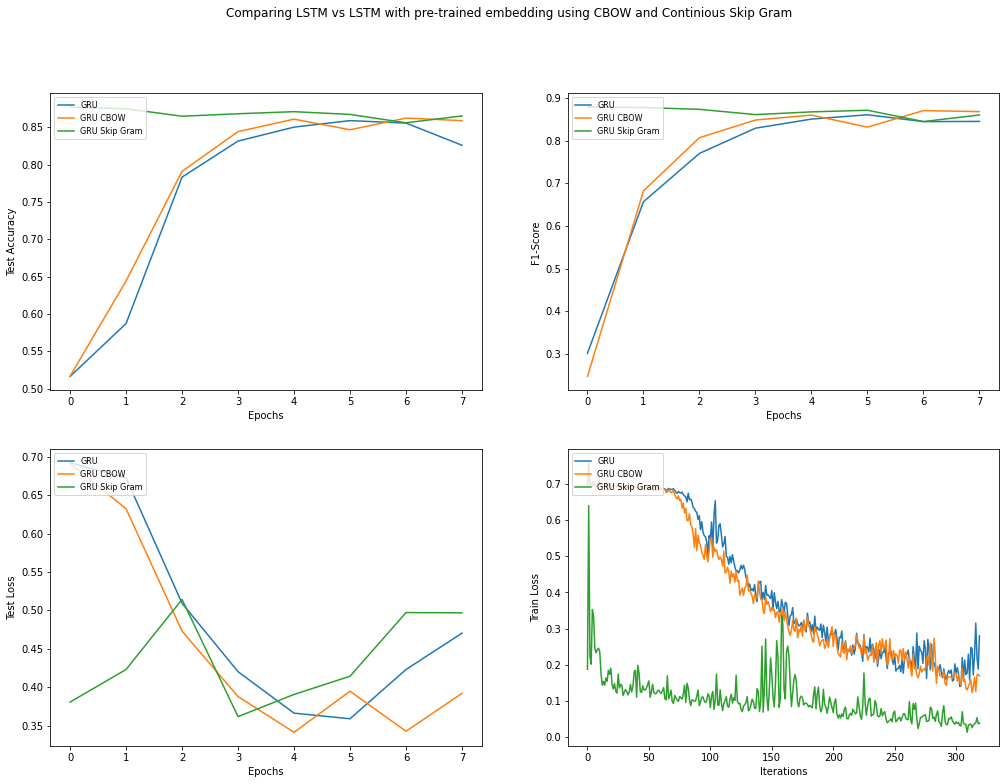

Running for Spam Dataset
Loading Text Data.....
Building Vocabulary.....
No. of Sentences: 1
Saving Vocab Model.....
Building Continious Bag of Words Dataset.....
Building Skip Gram Dataset.....
Reading Test CSV.....
------------Test Labels Distribution------------
0    499
1    101
Name: label, dtype: int64
Reading Train CSV.....
------------Train Labels Distribution------------
Building the main dataset.....
0    2001
1     399
Name: label, dtype: int64
Training Long Short Term Memory Network.....


100%|██████████| 100/100 [01:52<00:00,  1.12s/it]


Test Accuracy and F1-Score after epoch 99/100 is 0.9533333333333334 and 0.8444444444444444 for LSTM. Total Time : 0:01:52.395056
Training GRU.....


100%|██████████| 100/100 [01:48<00:00,  1.09s/it]


Test Accuracy and F1-Score after epoch 99/100 is 0.9583333333333334 and 0.8730964467005076 for GRU. Total Time : 0:01:48.557020
Training Naive RNN.....


100%|██████████| 100/100 [03:32<00:00,  2.13s/it]


Test Accuracy and F1-Score after epoch 99/100 is 0.81 and 0.2962962962962963 for Naive RNN. Total Time : 0:03:32.920400


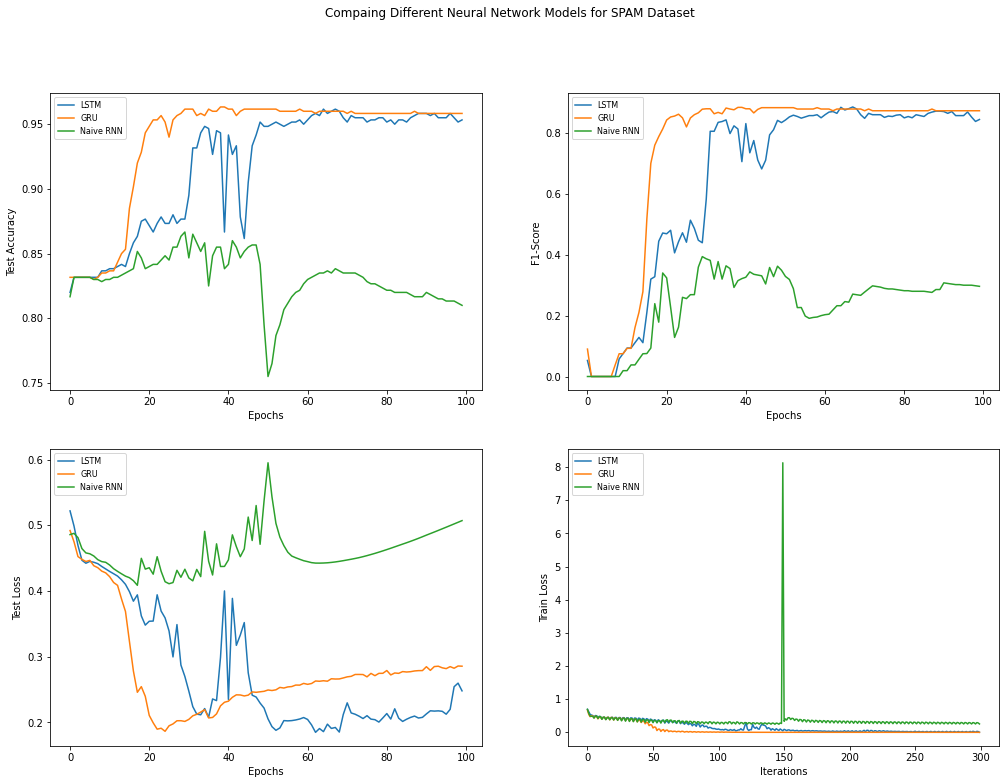

Running for IMDB Dataset
Loading Text Data.....
Loading Vocab Model.....
Building Vocabulary.....
No. of Sentences: 887872
Building Continious Bag of Words Dataset.....
Building Skip Gram Dataset.....
Reading Test CSV.....
------------Test Labels Distribution------------
0    5030
1    4970
Name: label, dtype: int64
Reading Train CSV.....
------------Train Labels Distribution------------
Building the main dataset.....
1    20030
0    19970
Name: label, dtype: int64
Training Long Short Term Memory Network.....


100%|██████████| 20/20 [05:44<00:00, 17.20s/it]


Test Accuracy and F1-Score after epoch 19/20 is 0.846 and 0.8381332772755938 for LSTM. Total Time : 0:05:44.070685
Training GRU.....


100%|██████████| 20/20 [05:35<00:00, 16.75s/it]


Test Accuracy and F1-Score after epoch 19/20 is 0.8577 and 0.8532838436952264 for GRU. Total Time : 0:05:35.052059
Training Naive RNN.....


100%|██████████| 20/20 [11:25<00:00, 34.30s/it]


Test Accuracy and F1-Score after epoch 19/20 is 0.512 and 0.6225831399845322 for Naive RNN. Total Time : 0:11:25.975306


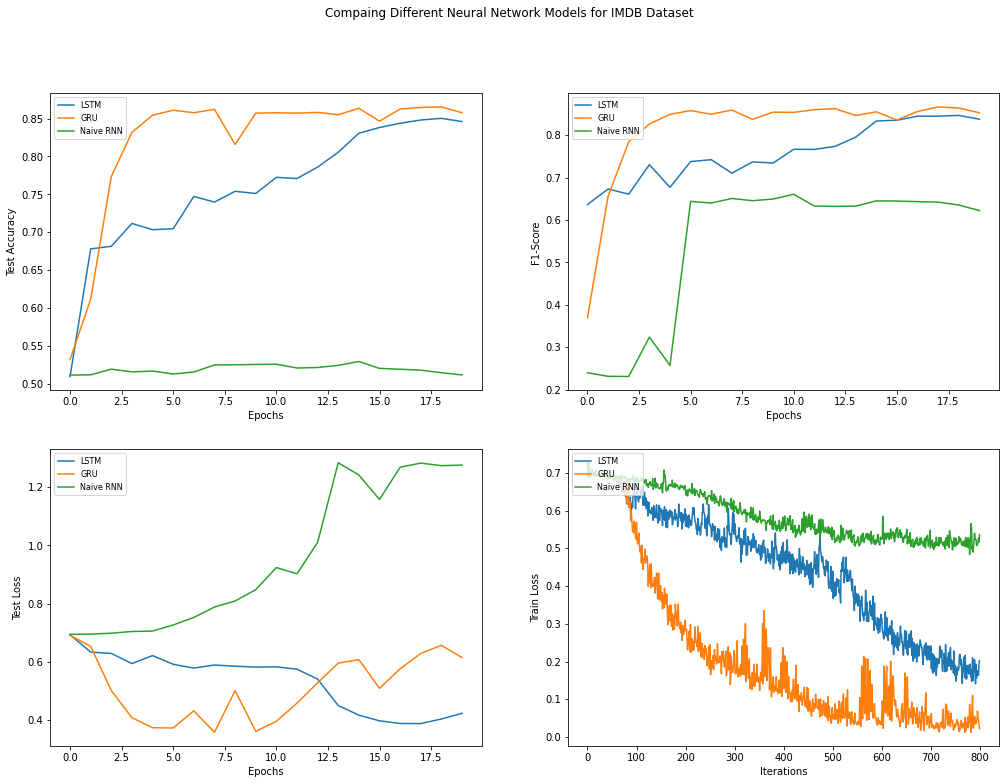

Running for FAKE_JOB Dataset
Loading Text Data.....
Building Vocabulary.....
No. of Sentences: 241663
Saving Vocab Model.....
Building Continious Bag of Words Dataset.....
Building Skip Gram Dataset.....
Reading Test CSV.....
------------Test Labels Distribution------------
0    3414
1     162
Name: fraudulent, dtype: int64
Reading Train CSV.....
------------Train Labels Distribution------------
Building the main dataset.....
0    13600
1      704
Name: fraudulent, dtype: int64
Training Long Short Term Memory Network.....


100%|██████████| 70/70 [07:57<00:00,  6.83s/it]


Test Accuracy and F1-Score after epoch 69/70 is 0.9762304250559284 and 0.7249190938511326 for LSTM. Total Time : 0:07:57.896561
Training GRU.....


100%|██████████| 70/70 [07:41<00:00,  6.60s/it]


Test Accuracy and F1-Score after epoch 69/70 is 0.9759507829977628 and 0.7074829931972788 for GRU. Total Time : 0:07:41.923390
Training Naive RNN.....


100%|██████████| 120/120 [00:32<00:00,  3.70it/s]


Test Accuracy and F1-Score after epoch 119/120 is 0.9976190476190476 and 0.9968454258675079 for GRU. Total Time : 0:00:32.443467
Training Naive RNN.....


100%|██████████| 120/120 [00:53<00:00,  2.25it/s]


Test Accuracy and F1-Score after epoch 119/120 is 0.8571428571428571 and 0.765625 for Naive RNN. Total Time : 0:00:53.386331


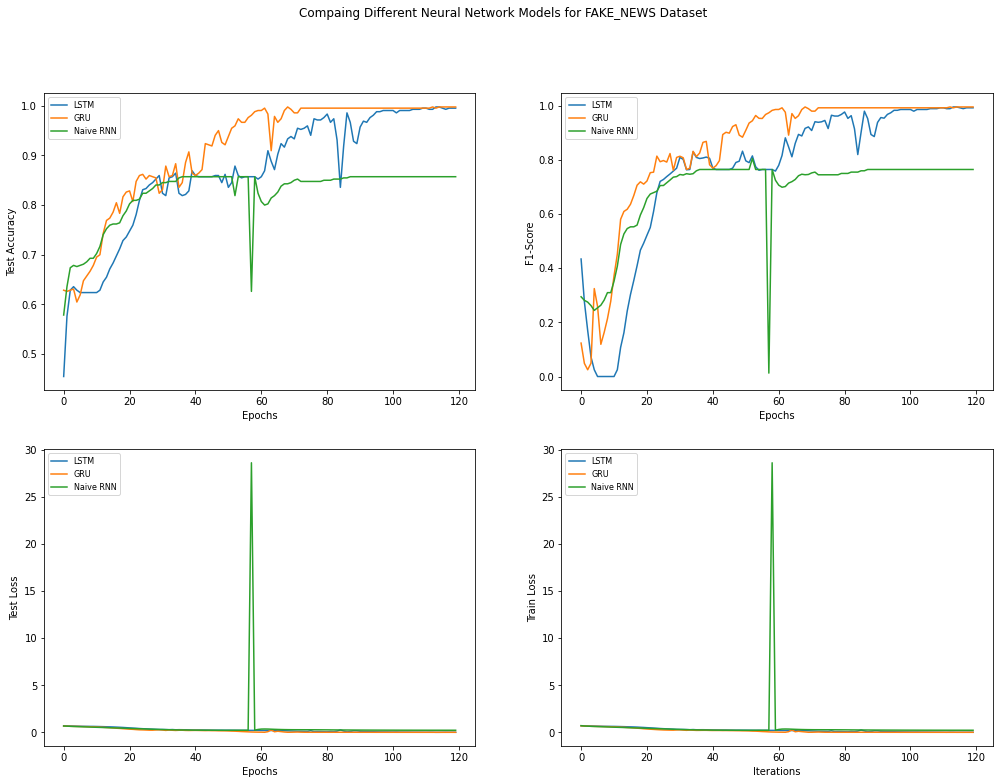

In [14]:
import torch
import torch.nn as nn
import pandas as pd
from torchtext.data import get_tokenizer
from collections import OrderedDict, Counter
from torchtext.vocab import vocab
from sklearn.metrics import accuracy_score
import re
import matplotlib.pyplot as plt
import time
from datetime import timedelta
from os.path import exists
from tqdm import tqdm
from sklearn.metrics import f1_score
import captum
from captum.attr import LayerIntegratedGradients
from captum.attr import TokenReferenceBase
from captum.attr import visualization

flows = [{'run_for' : 'Compare GRU vs CBOW GRU vs CKG GRU',
         'dataset' : 'IMDB'
        },{'run_for' : 'Compare GRU vs RNN vs LSTM',
         'dataset' : 'SPAM'
        },{'run_for' : 'Compare GRU vs RNN vs LSTM',
         'dataset' : 'IMDB'
        },{'run_for' : 'Compare GRU vs RNN vs LSTM',
         'dataset' : 'FAKE_JOB'
        },{'run_for' : 'Compare GRU vs RNN vs LSTM',
         'dataset' : 'FAKE_NEWS'
        }]

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

'''
Vocabulary that will be used by all the dataset and models.
Contains word to integer and sentences in the text. 

Accepts a blob of text from which the datasets are made
'''
class Vocabulary():
    def __init__(self, text, vocab_model = None):
        # Tokenizer used to tokenize words
        self.tokenizer = get_tokenizer("basic_english")
        self.text = text
        if vocab_model is not None:
            self.vocabulary = vocab_model
        else:
            self.tokens = self.tokenizer(text)
            count_token_dict = Counter(self.tokens)
            sorted_token_freq_dict = OrderedDict(sorted(count_token_dict.items(), key=lambda token: token[1], reverse=True))
            # Building vocabulary by adding special characters
            self.vocabulary = vocab(sorted_token_freq_dict, specials=['<unk>', '<start>', '<end>', '<pad>'], min_freq=30)
            self.vocabulary.set_default_index(0)
        self.sentences = []
        for sentence in re.compile('[.!?,]').split(text):
            tokens = self.tokenizer(sentence)
            if len(tokens) >= 3:
                self.sentences.append(tokens)
        print('No. of Sentences: {}'.format(len(self.sentences)))
    
    # For array style access
    def __getitem__(self, token):
        return self.vocabulary[token]
    
    # called by datasets
    def tokenize_string(self, strng):
        if isinstance(strng, str):
            return self.tokenizer(strng)
        else:
            return []

    # Size of the vocabulary
    def get_vocab_size(self):
        return self.vocabulary.__len__()


'''
This is the main dataset that will be used to train the classifiers. 
It takes pandas dataframe with training records, pandas dataframe with testing records, vocabulary.
And the column names of text and label.

This is called by the PyTorch Dataloader. So, its a child class of torch..Dataset
'''
class WordDataSet(torch.utils.data.Dataset):
    def __init__(self, train_data_frame, text_column_name, label_column_name, vocabulary, test_data_frame):
        self.df = train_data_frame
        self.text_column_name = text_column_name
        self.label_column_name = label_column_name
        self.vocabulary = vocabulary
        self.test_df = test_data_frame
        self.test_review_vectors, self.test_labels = self.get_all_test_samples()

    #Size of the training records
    def __len__(self):
        return len(self.df) 
    
    # Just a helper to lookup token in vocab and add to an array
    def lookup_and_add(self, x_arr, token):
        lookup_tensor = self.vocabulary[token]
        x_arr.append(lookup_tensor)

    # Returns vocab size
    def get_vocab_size(self):
        return self.vocabulary.get_vocab_size()

    # Length of seq of words, all the sequence would be of this lenght. Either by truncating the string, or by padding it. 
    def get_seq_length(self):
        return 180

    # Converts a string of words into a vector of integers
    def get_text_vector(self, strng, N):
        x_arr = []
        i = 0
        for token in self.vocabulary.tokenize_string(strng):
            if i == N:
                break
            self.lookup_and_add(x_arr, token)
            i += 1
        while i < N:
            self.lookup_and_add(x_arr, '<pad>')
            i += 1
        return x_arr
    
    # Returns a list of vector of integers, and their labels.
    def __getitem__(self, idx):
        N = self.get_seq_length()
        
        text = self.df[self.text_column_name][idx]
        label = self.df[self.label_column_name][idx]
        
        y = torch.tensor([label]).float()
        return torch.tensor(self.get_text_vector(text, N)), y

    # Vector of integers of test texts and their labels.
    def get_all_test_samples(self):
        X = []
        Y = []
        for i in range(len(self.test_df)):
            X.append(self.get_text_vector(self.test_df[self.text_column_name][i], self.get_seq_length()))
            Y.append([self.test_df[self.label_column_name][i]])
        return torch.tensor(X).to(device), torch.tensor(Y).float().to(device)

'''
Dataset that would be used to train Continious Bag of Words Model.
Takes in a vocabular
'''
class ContiniousBagOfWordsDataSet(torch.utils.data.Dataset):
    def __init__(self, vocabular):
        self.vocabulary = vocabular
        self.sentences = vocabular.sentences

    # size of sentences
    def __len__(self):
        return len(self.sentences) 

    # size of vocabulary
    def get_vocab_size(self):
        return self.vocabulary.get_vocab_size()
    
    #returns vocab
    def get_vocab(self):
        return self.vocabulary
    
    # Adds a batch for a given index
    def add_batch(self, X, Y, idx):
        tokens = self.sentences[idx]
        start_arr = []
        start_arr.append(self.vocabulary['<start>'])
        start_arr.append(self.vocabulary['<start>'])
        i = 1
        Y.append(self.vocabulary[tokens[0]])
        for i in range(1, 3):
            start_arr.append(self.vocabulary[tokens[i]])
        X.append(start_arr.copy())

        for i in range(3, len(tokens)):
            start_arr.pop(0)
            start_arr.append(self.vocabulary[tokens[i]])
            Y.append(self.vocabulary[tokens[i - 2]])
            X.append(start_arr.copy()) 
            if len(Y) > 1000:
                break
 
    #gets a batch from a given index
    def __getitem__(self, idx):
        Y = []
        X = []
        i = 0
        while len(Y) < 1000:
            self.add_batch(X, Y, (idx + i) % self.__len__())
            i += 1
        return torch.tensor(X), torch.tensor(Y)

'''
Dataset that would be used to train Skip Gram Model.
Takes in a vocabular
'''
class SkipGramDataSet(torch.utils.data.Dataset):
    def __init__(self, vocabular):
        self.vocabulary = vocabular
        self.sentences = vocabular.sentences

    # size of sentences
    def __len__(self):
        return len(self.sentences) 

    # size of vocabulary
    def get_vocab_size(self):
        return self.vocabulary.get_vocab_size()
    
    #returns vocab
    def get_vocab(self):
        return self.vocabulary
    
    # Adds a batch for a given index
    def add_batch(self, X, Y, idx):
        tokens = self.sentences[idx]
        ind = 0
        while ind + 5 < len(tokens):
            for i in range(ind, ind + 5):
                if i != ind + 2:
                    X.append(self.vocabulary[tokens[ind + 2]])
                    Y.append(self.vocabulary[tokens[i]])
            ind += 1
            if len(Y) > 1000:
                break

    #gets a batch from a given index
    def __getitem__(self, idx):
        Y = []
        X = []
        i = 0
        while len(Y) < 1000:
            self.add_batch(X, Y, (idx + i) % self.__len__())
            i += 1
        return torch.tensor(X), torch.tensor(Y)

'''
Multi Layer perceptron for classifying text data. 
'''
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dimension, output_dimension, vocab_size, sequence_length, embedding = None):
        super().__init__()
        #Use default embedding or use the embedding passed in the constructor. 
        #This can be embedding learned by cbow or skip gram model.
        self.emebeddings = embedding if embedding is not None else nn.Embedding(vocab_size, input_dimension, vocabular['<pad>'])
        '''
        Linear layer with input features of embedding_length * sequence_length
        Tanh activation
        A Linear Layer with 256 neurons to output_dimension 1
        Element wise sigmoid funtion for all the inputs in the batch 
        '''
        self.mlp = nn.Sequential(
            nn.Linear(input_dimension * sequence_length, 256),
            nn.Tanh(),
            nn.Linear(256, output_dimension),
            nn.Sigmoid()
        )
        nn.init.xavier_uniform_(self.mlp[0].weight)
        nn.init.xavier_uniform_(self.mlp[2].weight)
        self.criterion = nn.BCELoss()

    '''
    Embed the integers using the embeddings defined.
    apply sequential mlp 
    calculate loss if training step
    '''
    def forward(self, x, Y = None):
        embedding = self.emebeddings(x)
        out = self.mlp(embedding.view(embedding.shape[0], -1))
        loss = None
        if Y is not None:
            loss = self.criterion(out, Y)
            return out, loss
        return out

'''
Implementation of Naive RNN from scratch. (nn.RNN module is not used)
'''
class TextClassifierRNN(nn.Module):
    '''
    Use default embedding or use the embedding passed in the constructor. 
    This can be embedding learned by cbow or skip gram model. 

    A linear layer with size of input + hidden => hidden
    A linear layer with size of hidden => output
    '''
    def __init__(self, i_size, h_size, o_size, vocab_size, emb = None):
        super(TextClassifierRNN, self).__init__()
        self.embeddings = emb if emb is not None else nn.Embedding(vocab_size, i_size)
        self.hidden_size = h_size
        self.input_to_hidden_layer = nn.Linear(i_size + h_size, h_size)
        self.input_to_output_layer = nn.Linear(h_size, o_size)
        self.bceloss = nn.BCELoss()
        self.tanh = nn.Tanh()

    
    def get_initial_hidden_tensor(self):
        return nn.init.kaiming_uniform_(torch.empty(1, self.hidden_size))

    '''
    Apply the layers in a loop for all the samples in the batch.
    Then pick the last hidden layer and pass it through the input_to_output_layer
    Apply sigmoid on the logits and calculate the loss
    '''
    def forward(self, x, y = None):
        x = self.embeddings(x)
        h_previous = self.get_initial_hidden_tensor().expand(x.size()[0], -1).to(device)
        for i in range(x.size()[1]):
            x_tr = x[:, i, :]
            cat = torch.cat((x_tr, h_previous), 1)
            h_previous = torch.relu(self.input_to_hidden_layer(cat))
        
        logits = self.input_to_output_layer(h_previous)
        logits = torch.sigmoid(logits)

        loss = None 
        if y is not None:
            loss = self.bceloss(logits, y)
            return logits, loss
        return logits

'''
Implementation of Long Short Term Memory Nueral Network
'''
class LongShortTermMemoryRNN(nn.Module):
    '''
    Embedding similar to other model
    Multi layer bi-directional LSTM
    Linear layer to map hid_dim => out_dim
    '''
    def __init__(self, imp_dim, hid_dim, out_dim, vocab_size = None, emb = None):
        super(LongShortTermMemoryRNN, self).__init__()
        self.embeddings = emb if emb is not None else nn.Embedding(vocab_size, imp_dim)
        self.lstm =  nn.LSTM(imp_dim, hid_dim, num_layers = 2, bidirectional = False, batch_first=True, dropout = 0.2)
        self.linear_layer = nn.Linear(hid_dim, out_dim)
        self.bceloss = nn.BCELoss()
    
    '''
    Embed the vector of integers
    Apply LSTM
    Pick the last hidden layer
    Apply to_output layer
    calculate loss if labels are given
    '''
    def forward(self, X, Y = None):
        embeddings = self.embeddings(X)
        output, hidden = self.lstm(embeddings)

        last_output = output[:, -1, :]
        logits = self.linear_layer(last_output)
        logits = torch.sigmoid(logits)
        loss = None
        if Y is not None:
            loss = self.bceloss(logits, Y)
            return logits, loss
        return logits

'''
Implementation of Gated Reccurent Neural Network
'''
class GRURNN(nn.Module):
    '''
    Embedding similar to other model
    Multi layer bi-directional LSTM
    Linear layer to map hid_dim => out_dim
    '''
    def __init__(self, imp_dim, hid_dim, out_dim, vocab_size = None, emb = None):
        super(GRURNN, self).__init__()
        self.embeddings = emb if emb is not None else nn.Embedding(vocab_size, imp_dim)
        self.gru =  nn.GRU(imp_dim, hid_dim, num_layers = 2, bidirectional = False, batch_first=True, dropout = 0.2)
        self.linear_layer = nn.Linear(hid_dim, out_dim)
        self.bceloss = nn.BCELoss()
    
    '''
    Embed the vector of integers
    Apply GRU
    Pick the last hidden layer
    Apply to_output layer
    calculate loss if labels are given
    '''
    def forward(self, X, Y = None):
        embeddings = self.embeddings(X)
        output, hidden = self.gru(embeddings)

        last_output = output[:, -1, :]
        logits = self.linear_layer(last_output)
        logits = torch.sigmoid(logits)
        loss = None
        if Y is not None:
            loss = self.bceloss(logits, Y)
            return logits, loss
        return logits

    
'''
Continious Bag of Words model
'''
class ContiniousBagOfWords(nn.Module):
    def __init__(self, vcb_size, pad_indx):
        '''
        Embedding layer and linear layer
        '''
        super(ContiniousBagOfWords, self).__init__()
        self.embs = nn.Embedding(vcb_size, EMBEDDING_DIM)
        self.linear = nn.Linear(in_features=EMBEDDING_DIM, out_features = vcb_size)

        '''
        Pass the vector of input through embedding layer
        Calculate the mean along all the vectors
        Pass through the output layer and get the logits
        '''
    def forward(self, words_indxs):
        emb = self.embs(words_indxs)
        return self.linear(emb.mean(axis=1))

class SkipGramModel(nn.Module):
    def __init__(self, vcb_size, pad_indx):
        '''
        Embedding layer and linear layer
        '''
        super(SkipGramModel, self).__init__()
        self.embs = nn.Embedding(vcb_size, EMBEDDING_DIM)
        self.linear = nn.Linear(in_features=EMBEDDING_DIM, out_features = vcb_size)

        '''
        Pass the vector of input through embedding layer
        Pass through the output layer and get the logits
        '''
    def forward(self, words_indxs):
        embs = self.embs(words_indxs)
        return self.linear(embs)



@torch.no_grad()
def get_test_model_accuracy(model):
    i = 0
    preds = []
    while i < len(clf_data_set.test_labels):
        X = clf_data_set.test_review_vectors[i:min(i + 1000, len(clf_data_set.test_review_vectors))]
        Y = clf_data_set.test_labels[i:min(i + 1000, len(clf_data_set.test_review_vectors))].to(device)
        Y, loss = model(X, Y)
        Y = Y.cpu()
        for y in Y.cpu():
            preds.append(1.0 if y.item() > 0.5 else 0.0)
        i += 1000
    return accuracy_score(clf_data_set.test_labels.cpu(), preds), f1_score(clf_data_set.test_labels.cpu(), preds), loss.item()

def train_word_2_vec_model(w2v_model, data_set, name):
    w2v_model = w2v_model.to(device)
    start = time.time()
    c_e_loss = nn.CrossEntropyLoss()
    train_sampler = torch.utils.data.RandomSampler(data_set, num_samples=int(1e10))
    train_loader_ones = torch.utils.data.dataloader.DataLoader(data_set, sampler=train_sampler, batch_size=1)

    optimizer = torch.optim.AdamW(w2v_model.parameters())
    itr = iter(train_loader_ones)
    for i in tqdm(range(W2V_LOOPS)):
        optimizer.zero_grad()
        batch = next(itr)
        X, Y = batch[0], batch[1]
        X = X.to(device)
        Y = Y.to(device)
        loss = c_e_loss(w2v_model(torch.squeeze(X, 0)), torch.squeeze(Y, 0))
        loss.backward()
        optimizer.step() 
    print('Model Name: {}. Loss : {}. Completed: {}%. Elapsed Time: {}'.format(name, loss.item(), i/100, timedelta(seconds = time.time() - start)))


def train_model(model, name):
    model = model.to(device)
#     optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1, betas=(0.9, 0.99), eps=1e-8)
    optimizer = torch.optim.AdamW(model.parameters())

    test_acc = []
    train_loss_arr = []
    test_loss_arr = []
    start = time.time()
    f1_arr = []
    for epoch in tqdm(range(EPOCHS)):
        start_epoch = time.time()        
        train_sampler = torch.utils.data.SequentialSampler(clf_data_set)
        train_loader_ones = torch.utils.data.dataloader.DataLoader(clf_data_set, sampler=train_sampler, batch_size=1000)
        itr = iter(train_loader_ones)
        it = 0
        for x, y in itr:
            optimizer.zero_grad()
            x = x.to(device)
            y = y.to(device)
            preds, loss = model(x, y)
            loss.backward()
            optimizer.step()
            it += 1
            train_loss_arr.append(loss.item())
#         print('Model: {}. Loss : {}, Itr {}, Epoch: {}. Epoch Time Curr: {}'.format(name, loss.item(), it, epoch, timedelta(seconds = time.time() - start_epoch)))
        acc, f1, test_loss = get_test_model_accuracy(model)
        test_acc.append(acc)
        f1_arr.append(f1)
        test_loss_arr.append(test_loss)
    print('Test Accuracy and F1-Score after epoch {}/{} is {} and {} for {}. Total Time : {}'.format(epoch, EPOCHS, acc, f1, name, timedelta(seconds = time.time() - start)))
    acc_plt.plot(test_acc, label = name)
    f1_plt.plot(f1_arr, label = name)
    test_loss_plt.plot(test_loss_arr, label = name)
    train_loss_plt.plot(train_loss_arr, label = name)
    
    return test_acc, train_loss_arr

def run_all_models_with_condition():
    print('Loading Text Data.....')
    with open(text_file_path, 'r') as f:
        text = f.read()
        
    global vocab_model
    vocab_model = None
    if exists(dataset_name + 'vocab.pt'):
        print('Loading Vocab Model.....')
        vocab_model = torch.load(dataset_name + 'vocab.pt')
    print('Building Vocabulary.....')
    global vocabular
    vocabular = Vocabulary(text, vocab_model)
    if exists(dataset_name + 'vocab.pt') is False:
        print('Saving Vocab Model.....')
        vocab_model = torch.save(vocabular.vocabulary, dataset_name + 'vocab.pt')

    global cbow_dataset
    print('Building Continious Bag of Words Dataset.....')
    cbow_dataset = ContiniousBagOfWordsDataSet(vocabular)

    global skpgr_dataset
    print('Building Skip Gram Dataset.....')
    skpgr_dataset = SkipGramDataSet(vocabular)

    global test_df
    print('Reading Test CSV.....')
    test_df = pd.read_csv(test_csv_path)
    print('------------Test Labels Distribution------------')
    
    print(test_df[label_col].value_counts())


    global train_df
    print('Reading Train CSV.....')
    train_df = pd.read_csv(train_csv_path)
    print('------------Train Labels Distribution------------')
    print('Building the main dataset.....')
    print(train_df[label_col].value_counts())


    global clf_data_set
    clf_data_set = WordDataSet(train_df, text_col, label_col, vocabular, test_df)
   
    cbow_model = None
    if 'CBOW' in train:
        if exists(dataset_name + 'cbow_model.pt'):
            print('Loading CBOW Model.....')
            cbow_model = torch.load(dataset_name + 'cbow_model.pt')
        else:
            print('Training CBOW Model.....')
            cbow_model = ContiniousBagOfWords(cbow_dataset.get_vocab_size(), vocabular['<pad>'])
            train_word_2_vec_model(cbow_model, cbow_dataset, 'Continious Bag Of Words')
            print('Saving CBOW Model.....')
            torch.save(cbow_model, dataset_name + 'cbow_model.pt')

    sg_model = None
    if 'SG' in train:
        if exists(dataset_name + 'skip_gram_model.pt'):
            print('Loading Skip Gram Model.....')
            sg_model = torch.load(dataset_name + 'skip_gram_model.pt')
        else:
            print('Training Skip Gram Model.....')
            sg_model = SkipGramModel(cbow_dataset.get_vocab_size(), vocabular['<pad>'])
            train_word_2_vec_model(sg_model, skpgr_dataset, 'Skip Gram')
            print('Saving Skip Gram Model.....')
            torch.save(sg_model, dataset_name + 'skip_gram_model.pt')
    

    if 'MLP' in train:
        global mlp
        print('Training MLP Without embedding.....')
        mlp = MultiLayerPerceptron(EMBEDDING_DIM, 1, clf_data_set.get_vocab_size(), clf_data_set.get_seq_length(), embedding = None)
        test_acc, loss_arr = train_model(mlp, 'MLP')
        torch.save(mlp, 'mlp_without_embeddings.pt')
        models['mlp'] = mlp


    if 'LSTM' in train: 
        global lstm
        print('Training Long Short Term Memory Network.....')
        lstm = LongShortTermMemoryRNN(EMBEDDING_DIM, 128, 1, vocab_size=clf_data_set.get_vocab_size())
        test_acc, loss_arr = train_model(lstm, 'LSTM')
        torch.save(lstm, 'lstm.pt')
        models['lstm'] = lstm

    
    if 'GRU' in train:
        global gru
        print('Training GRU.....')
        gru = GRURNN(EMBEDDING_DIM, 128, 1, vocab_size=clf_data_set.get_vocab_size())
        test_acc, loss_arr = train_model(gru, 'GRU')
        torch.save(gru, 'gru.pt')
        models['gru'] = gru
        if cbow_model is not None and should_use_embeddings:
            print('Training GRU with cbow embedding.....')
            gru = GRURNN(EMBEDDING_DIM, 128, 1, vocab_size=clf_data_set.get_vocab_size(), emb = cbow_model.embs)
            test_acc, loss_arr = train_model(gru, 'GRU CBOW')
            torch.save(gru, 'gru_with_cbow_embeddings.pt')
        if sg_model is not None and should_use_embeddings:
            print('Training GRU with skip gram embedding.....')
            lstm = GRURNN(EMBEDDING_DIM, 128, 1, vocab_size=clf_data_set.get_vocab_size(), emb = sg_model.embs)
            lstm, loss_arr = train_model(gru, 'GRU Skip Gram')
            torch.save(gru, 'gru_with_skip_gram_embeddings.pt')
        
    if 'NaiveRNN' in train:
        global nrnn
        print('Training Naive RNN.....')
        nrnn = TextClassifierRNN(EMBEDDING_DIM, 128, 1, vocab_size=clf_data_set.get_vocab_size())
        test_acc, loss_arr = train_model(nrnn, 'Naive RNN')
        torch.save(nrnn, 'rnn.pt')
        models['rnn'] = nrnn

    acc_plt.set(xlabel='Epochs', ylabel='Test Accuracy')
    f1_plt.set(xlabel='Epochs', ylabel='F1-Score')
    test_loss_plt.set(xlabel='Epochs', ylabel='Test Loss')
    train_loss_plt.set(xlabel='Iterations', ylabel='Train Loss')
    acc_plt.legend(loc=2, prop={'size': 8})
    f1_plt.legend(loc=2, prop={'size': 8})
    test_loss_plt.legend(loc=2, prop={'size': 8})
    train_loss_plt.legend(loc=2, prop={'size': 8})

    plt.show()
    
all_models = {}
for flow in flows:
    W2V_LOOPS = 10_000
    EMBEDDING_DIM = 300
    fig, ((acc_plt, f1_plt), (test_loss_plt, train_loss_plt)) = plt.subplots(2, 2)
    fig.set_size_inches(17, 12, forward=True)
    all_models[flow['dataset']] = {}
    models = all_models[flow['dataset']]
    if flow['dataset'] == 'SPAM':
        EPOCHS = 100
        print('Running for Spam Dataset')
        dataset_name = 'spam'
        text_file_path = path_to_the_data_folder + 'spam-dataset/spam_emails.txt'
        train_csv_path = path_to_the_data_folder + 'spam-dataset/spam_train_data.csv'
        test_csv_path = path_to_the_data_folder + 'spam-dataset/spam_test_data.csv' 
        text_col = 'email'
        label_col = 'label'
    if flow['dataset'] == 'FAKE_JOB':
        EPOCHS = 70
        print('Running for FAKE_JOB Dataset')
        dataset_name = 'FAKE_JOB'
        text_file_path = path_to_the_data_folder + 'fake-job/fake_job.txt'
        train_csv_path = path_to_the_data_folder + 'fake-job/fake_job_train.csv'
        test_csv_path = path_to_the_data_folder + 'fake-job/fake_job_test.csv' 
        text_col = 'description'
        label_col = 'fraudulent'
    if flow['dataset'] == 'FAKE_NEWS':
        EPOCHS = 120
        print('Running for FAKE_NEWS Dataset')
        dataset_name = 'FAKE_NEWS'
        text_file_path = path_to_the_data_folder + 'fake-news/fake_news.txt'
        train_csv_path = path_to_the_data_folder + 'fake-news/fake_news_test.csv'
        test_csv_path = path_to_the_data_folder + 'fake-news/fake_news_test.csv' 
        text_col = 'text'
        label_col = 'label'
    if flow['dataset'] == 'IMDB':
        EPOCHS = 30
        dataset_name = 'imdb'
        print('Running for IMDB Dataset')
        text_file_path = path_to_the_data_folder + 'imdb-dataset/review_text_data.txt'
        train_csv_path = path_to_the_data_folder + 'imdb-dataset/train_data.csv'
        test_csv_path = path_to_the_data_folder + 'imdb-dataset/test_data.csv'
        text_col = 'reviews'
        label_col = 'label'

    if flow['run_for'] == 'Compare GRU vs CBOW GRU vs CKG GRU':  
        should_use_embeddings = True
        fig.suptitle('Comparing LSTM vs LSTM with pre-trained embedding using CBOW and Continious Skip Gram')
        EPOCHS = 8
        train = ['CBOW', 'GRU', 'SG']
    else:
        should_use_embeddings = False
        fig.suptitle('Compaing Different Neural Network Models for {} Dataset'.format(flow['dataset'])) 
        train = ['GRU','NaiveRNN', 'LSTM']
    
    run_all_models_with_condition()


In [23]:
# this is just a copy of the function in the WordDataSet above. Just copying it here and modifying it to handle user promts. 
def lookup_and_add(x_arr, token):
        lookup_tensor = vocabular[token]
        x_arr.append(lookup_tensor)
        
# convert text into vectors for user promts
def get_text_vector(strng):
        x_arr = []
        for token in vocabular.tokenize_string(strng):
            lookup_and_add(x_arr, token)
        return torch.tensor([x_arr]).to(device)

# from the output of the sigmoid function into binary positive and negative classes.
def get_prediction(pred):
    return 'positive' if pred > 0.5 else 'negative'

# function to analyze the promt. takes in the user promt, model and the actual preds
def analyze_promt(promt, model, actual_predition):
    # set grads to 0
    model.zero_grad()
    
    # tokenize string for visualization
    tok = vocabular.tokenize_string(promt)
    
    vecs = get_text_vector(promt)
    
    #predict using forward pass
    prediction = model(vecs)[0].item()
    
    # just a token refernece for attribute
    tr = TokenReferenceBase(reference_token_idx=vocabular['<pad>'])

    # boiler plate code to visualize the data
    ref_ind = tr.generate_reference(len(tok), device=device).unsqueeze(0)

    attr, delta = grads.attribute(vecs, ref_ind, n_steps=420, return_convergence_delta=True)    
    sum_all_the_embeds = attr.sum(dim=2).squeeze()
    sum_all_the_embeds = sum_all_the_embeds[0:len(tok)]
    normalized_sums = sum_all_the_embeds / torch.norm(sum_all_the_embeds)
    attr = attr.cpu().detach().numpy()
    data_arr.append(visualization.VisualizationDataRecord(normalized_sums.cpu().detach().numpy(),
                                                          actual_predition,get_prediction(prediction),
                                                          get_prediction(actual_predition),'positve',normalized_sums.sum(),
                                                          tok,delta))
#samples
gru_imdb = all_models['IMDB']['gru']
grads = LayerIntegratedGradients(gru, gru.embeddings)
data_arr = []
analyze_promt("The film is great", gru, 1)
analyze_promt("The film was not great", gru, 0)
analyze_promt("I highly reccommmend this film", gru, 1)
analyze_promt("Why should anyone watch this film?", gru, 0)
analyze_promt("The film was boring", gru, 0)
analyze_promt("Everyone must go and watch this film", gru, 1)
analyze_promt("The first part was good, the last part was boring", gru, 1)
_none = visualization.visualize_text(data_arr)

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
positive,positive (1.00),positve,1.23,the film is great
negative,negative (0.00),positve,-1.96,the film was not great
positive,positive (1.00),positve,0.54,i highly reccommmend this film
negative,negative (0.00),positve,-1.35,why should anyone watch this film ?
negative,negative (0.00),positve,-1.48,the film was boring
positive,positive (1.00),positve,0.34,everyone must go and watch this film
positive,positive (1.00),positve,-0.11,"the first part was good , the last part was boring"
